#**Mileage Prediction-Regression Analysis**

##**Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

##**Import Data**

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MPG.csv')

In [6]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
df.nunique

<bound method DataFrame.nunique of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle mal

#**Data Processing**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


##**Remove Missing Values**

In [12]:
df=df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#**Data Visualization**

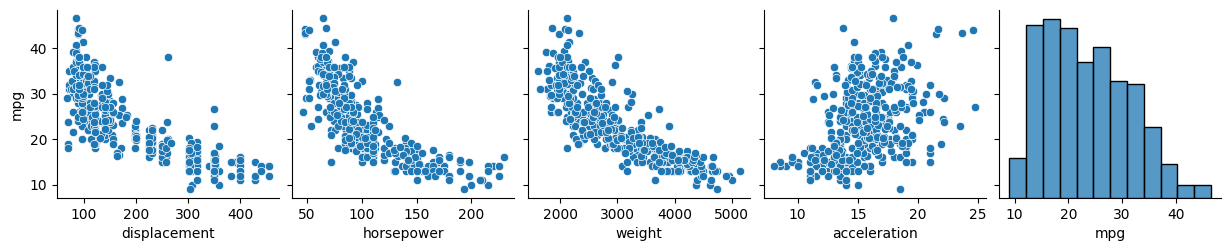

In [16]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

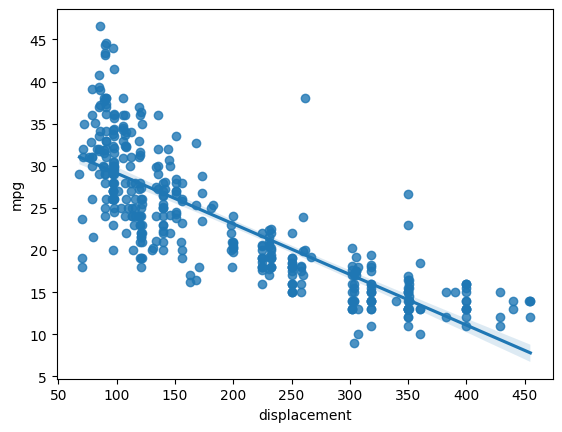

In [17]:
sns.regplot(x='displacement',y='mpg',data=df)

#**Define Target Variable y and Feature X**

In [18]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [19]:
y=df['mpg']

In [20]:
y.shape

(392,)

In [21]:
x=df[['displacement','horsepower','weight','acceleration']]

In [22]:
x.shape

(392, 4)

In [23]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [24]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

#**Scaling Data**

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss=StandardScaler()

In [27]:
x=ss.fit_transform(x)

In [28]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [29]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


####After Standardization Mean is Zero and Standard Deviation is one

#**Train Test Split Data**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

#**Choosen LinearRegression Model**

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr=LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
lr.intercept_

23.725139778636965

In [37]:
lr.coef_

array([-1.04061664, -2.14102322, -4.02858566, -0.14389381])

###**To Calculate Mileage**
####**Mileage**=23.7-1.04Displacement - 2.14Horsepower - 4.02Weight - 0.14Acceleration+error

#**Predict Test Data**

In [38]:
y_pred=lr.predict(x_test)

In [39]:
y_pred

array([30.29700847, 24.72839529, 32.77893004, 31.27178433, 26.18332869,
       30.19790285,  9.81526818, 29.58152065, 22.56385356, 33.14051592,
       13.23874517, 24.1391044 , 12.83017376, 30.14280976, 20.38189119,
       27.02039027, 23.57590536, 29.14144886, 27.30788492, 27.65446095,
       24.90558498, 31.16937391, 31.47571282, 18.86721149, 31.78148011,
       28.87714445, 25.22555967, 21.20195807, 32.54635112, 28.1290699 ,
       13.05421087, 22.96640113, 18.90765778, 27.64588509, 12.26835702,
       31.47347388, 12.76589319, 30.02083426, 14.3995173 ,  8.22494206,
       15.94191344, 30.53780211, 31.06244592, 29.44145151, 11.87276816,
        7.01517914, 22.00319607, 30.79931703, 28.60670965, 31.69623013,
       13.98299429, 28.38757853, 28.46369689, 29.32033768, 23.65251357,
       19.54780288, 21.69478155, 23.87779746, 27.91210094, 28.70335923,
        5.28311079, 23.53912511, 24.80800038, 25.40489967, 27.08954575,
       29.33975889, 26.41480722, 31.70667484, 20.92640591,  9.99

#**ModelAccuracy**

In [40]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [41]:
mean_absolute_error(y_test,y_pred)

3.571062458260172

In [42]:
mean_absolute_percentage_error(y_test,y_pred)

0.16585849039360423

In [43]:
r2_score(y_test,y_pred)

0.6464709361746057

#**Polynomial Regression**

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [46]:
x_train2=poly.fit_transform(x_train)

In [47]:
x_test2=poly.fit_transform(x_test)

In [49]:
lr.fit(x_train2,y_train)

LinearRegression()

In [50]:
lr.intercept_

21.36346506788059

In [51]:
lr.coef_

array([-2.52368317, -6.00923236, -1.20614165, -1.28760869,  1.70981614,
        0.07979862,  0.84172331,  0.84342873, -1.06549005,  0.38737357])

In [52]:
y_pred1=lr.predict(x_test2)

#**Model Accuracy**

In [54]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [56]:
mean_absolute_error(y_test,y_pred1)

3.202958801884848

In [57]:
mean_absolute_percentage_error(y_test,y_pred1)

0.14172552686749482

In [58]:
r2_score(y_test,y_pred1)

0.6726357867835955